<a href="https://colab.research.google.com/github/p15avgo/colab/blob/master/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Activation, Dropout, Flatten, Dense
from keras import backend as K 
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras import backend


In [2]:
backend.set_image_data_format('channels_last')

In [3]:
classifier = tf.keras.Sequential()

In [4]:
model = tf.keras.Sequential()

In [5]:

model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))



In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=34,activation='softmax'))


In [7]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)       

In [8]:
data_root = ('/content/drive/MyDrive/release_v0/images')



In [9]:
batch_size = 32
IMAGE_SHAPE = 64,64

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.3 , rescale=1/255)
image_data_train = image_generator.flow_from_directory(str(data_root),target_size=IMAGE_SHAPE)


Found 2013 images belonging to 34 classes.


In [10]:
train_image_generator = image_generator.flow_from_directory(str(data_root),subset='training',target_size=IMAGE_SHAPE) # Generator for our training data
validation_image_generator = image_generator.flow_from_directory(str(data_root),subset='validation',target_size=IMAGE_SHAPE)# Generator for our validation data

Found 1420 images belonging to 34 classes.
Found 593 images belonging to 34 classes.


In [11]:
for image_batch, label_batch in image_data_train:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 64, 64, 3)
Label batch shape:  (32, 34)


In [12]:
predictions = model(image_batch)

predictions.shape

TensorShape([32, 34])

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']
    )

In [14]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
    self.model.reset_metrics()

In [15]:
steps_per_epoch=np.ceil(image_data_train.n/batch_size)
batch_stats_callback = CollectBatchStats() 
history = model.fit(image_data_train,validation_data = validation_image_generator, epochs=70,callbacks = [batch_stats_callback],verbose=2)

Epoch 1/70
63/63 - 675s - loss: 3.4718 - accuracy: 0.0625 - val_loss: 3.5004 - val_accuracy: 0.0422
Epoch 2/70
63/63 - 16s - loss: 3.5111 - accuracy: 0.0312 - val_loss: 3.4815 - val_accuracy: 0.0590
Epoch 3/70
63/63 - 16s - loss: 3.2258 - accuracy: 0.1250 - val_loss: 3.2896 - val_accuracy: 0.1265
Epoch 4/70
63/63 - 16s - loss: 2.6444 - accuracy: 0.1562 - val_loss: 2.8050 - val_accuracy: 0.1653
Epoch 5/70
63/63 - 16s - loss: 2.3206 - accuracy: 0.2812 - val_loss: 2.3105 - val_accuracy: 0.2833
Epoch 6/70
63/63 - 16s - loss: 2.1717 - accuracy: 0.3438 - val_loss: 2.1828 - val_accuracy: 0.2799
Epoch 7/70
63/63 - 16s - loss: 2.0137 - accuracy: 0.2188 - val_loss: 1.8986 - val_accuracy: 0.3153
Epoch 8/70
63/63 - 16s - loss: 1.9457 - accuracy: 0.2812 - val_loss: 1.8835 - val_accuracy: 0.3491
Epoch 9/70
63/63 - 16s - loss: 1.7892 - accuracy: 0.3750 - val_loss: 1.7643 - val_accuracy: 0.3845
Epoch 10/70
63/63 - 16s - loss: 2.0673 - accuracy: 0.2812 - val_loss: 1.6906 - val_accuracy: 0.4199
Epoch 11

In [16]:
history.history

{'accuracy': [0.0625,
  0.03125,
  0.125,
  0.15625,
  0.28125,
  0.34375,
  0.21875,
  0.28125,
  0.375,
  0.28125,
  0.25,
  0.46875,
  0.46875,
  0.25,
  0.53125,
  0.53125,
  0.4375,
  0.40625,
  0.27586206793785095,
  0.40625,
  0.34375,
  0.40625,
  0.4375,
  0.75,
  0.5625,
  0.59375,
  0.59375,
  0.5,
  0.5625,
  0.5,
  0.6875,
  0.5625,
  0.53125,
  0.625,
  0.59375,
  0.59375,
  0.65625,
  0.53125,
  0.625,
  0.625,
  0.84375,
  0.71875,
  0.65625,
  0.5625,
  0.5625,
  0.71875,
  0.75,
  0.71875,
  0.5625,
  0.6875,
  0.625,
  0.53125,
  0.96875,
  0.8125,
  0.6875,
  0.6875,
  0.875,
  0.71875,
  0.8125,
  0.6875,
  0.84375,
  0.625,
  0.75,
  0.84375,
  0.84375,
  0.875,
  0.84375,
  0.78125,
  0.71875,
  0.84375],
 'loss': [3.4718101024627686,
  3.511063575744629,
  3.2257728576660156,
  2.6444039344787598,
  2.3206067085266113,
  2.1716537475585938,
  2.013660192489624,
  1.9456758499145508,
  1.7892467975616455,
  2.067291021347046,
  1.700336217880249,
  1.604600429534

In [17]:
train_loss,train_acc = model.evaluate(train_image_generator,steps=45)
test_loss, test_acc = model.evaluate(validation_image_generator,steps=19)
print('Train: %.3f, Test: %.3f'%(train_acc,test_acc))

19/19 [==============================] - 4s 191ms/step - loss: 0.3006 - accuracy: 0.9224
Train: 0.916, Test: 0.922


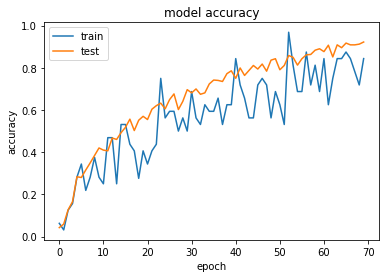

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

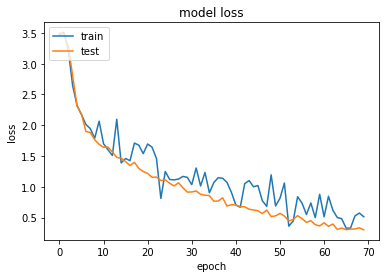

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
class_names = sorted(image_data_train.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['A1L', 'A2L', 'A3L', 'Adl', 'Ael', 'Fal', 'Fbl', 'Fcl', 'Fdl',
       'Fel', 'Ffl', 'Fgl', 'Fhl', 'Fil', 'Fll', 'Fml', 'Gal', 'Gbl',
       'Gcl', 'Gdl', 'Ggl', 'Gzl', 'Nal', 'Nbl', 'Ncl', 'Ndl', 'Nel',
       'Nfl', 'Ngl', 'Nhl', 'Nil', 'Nll', 'Nml', 'New'], dtype='<U3')

In [21]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [22]:
label_id = np.argmax(label_batch, axis=-1)

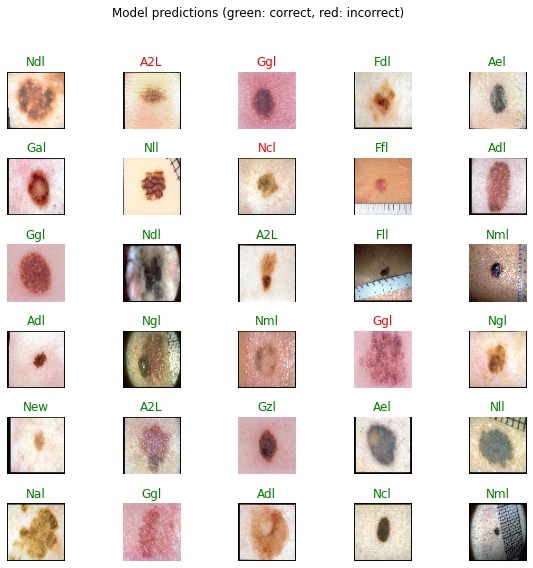

In [23]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")